In [110]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [155]:
def Direct(y, t, TF1, k1, k2, Kd1, total_time):
    if t > 30:
        TF1 = 0
#     if t > total_time * 2/3:
#         TF1 = 1
    d_dt = np.zeros(1)
    d_dt[0] = k1*(1 - 1/(1+ (TF1/Kd1))) - k2*y[0]
    return d_dt
def integrate_Direct(y0, time_steps, params):
    total_time = time_steps[-1]
    result = odeint(
        lambda y, t: Direct(y, t, params['TF1'], params['k1'], params['k2'], params['Kd1'], total_time),
        y0, time_steps
    )
    return result

In [154]:
def Indirect(y, t, TF1, k1, k2, k3, k4, k5, k6, Kd1, Kd2, Kd11, total_time):
    if t > 30:
        TF1 = 0
#     if t > total_time * 2/3:
#         TF1 = 1
    d_dt = np.zeros(3)
    d_dt[0] = (1-(1/(1+(y[2]/Kd2))))*k1 - k2*y[0]
    d_dt[1] = (1-(1/(1+(TF1/Kd11))))*k3 - k4*y[1]
    d_dt[2] = k5*y[1] - k6*y[2]
    return d_dt
def integrate_Indirect(y0, time_steps, params):
    total_time = time_steps[-1]
    result = odeint(
        lambda y, t: Indirect(y, t, params['TF1'], params['k1'], params['k2'], params['k3'], params['k4'],
                             params['k5'], params['k6'], params['Kd1'], params['Kd2'], params['Kd11'], total_time),
        y0, time_steps
    )
    return result

In [153]:
def AndGate(y, t, TF1, k1, k2, k3, k4, k5, k6, Kd1, Kd2, Kd11, total_time):
    if t > 30:
        TF1 = 0
#     if t > total_time * 2/3:
#         TF1 = 1
    d_dt = np.zeros(3)
    d_dt[0] = (1 - (1 / (1 + (TF1 / Kd1)))) * (1 - (1 / (1 + (y[2] / Kd2)))) * k1 - k2 * y[0]
    d_dt[1] = (1 - (1 / (1 + (TF1 / Kd11)))) * k3 - k4 * y[1]
    d_dt[2] = k5 * y[1] - k6 * y[2]
    return d_dt
def integrate_AndGate(y0, time_steps, params):
    total_time = time_steps[-1]
    result = odeint(
        lambda y, t: AndGate(y, t, params['TF1'], params['k1'], params['k2'], params['k3'], params['k4'],
                             params['k5'], params['k6'], params['Kd1'], params['Kd2'], params['Kd11'], total_time),
        y0, time_steps
    )
    return result

In [152]:
def OrGate(y, t, TF1, k1, k2, k3, k4, k5, k6, Kd1, Kd2, Kd11, total_time):
    if t > 30:
        TF1 = 0
#     if t > total_time * 2/3:
#         TF1 = 1
    d_dt = np.zeros(3)
    d_dt[0] = (1 - ((1/(1+ (TF1 / Kd1)))*(1/(1+(y[2] / Kd2))))) * k1 - k2 * y[0]
    d_dt[1] = (1 - (1 / (1 + (TF1 / Kd11)))) * k3 - k4 * y[1]
    d_dt[2] = k5 * y[1] - k6 * y[2]
    return d_dt
def integrate_OrGate(y0, time_steps, params):
    total_time = time_steps[-1]
    result = odeint(
        lambda y, t: OrGate(y, t, params['TF1'], params['k1'], params['k2'], params['k3'], params['k4'],
                             params['k5'], params['k6'], params['Kd1'], params['Kd2'], params['Kd11'], total_time),
        y0, time_steps
    )
    return result

In [156]:
params = {'TF1':1, 'k1':1, 'k2':1, 'k3':1, 'k4':1, 'k5':1, 'k6':1, 'Kd1':1, 'Kd2':1, 'Kd11':1}
y0 = [0, 0, 0]
y0_direct = [0]
time_steps = np.linspace(0, 60, 100)

In [157]:
direct_data = integrate_Direct(y0_direct, time_steps, params)
indirect_data = integrate_Indirect(y0, time_steps, params)
and_data = integrate_AndGate(y0, time_steps, params)
or_data = integrate_OrGate(y0, time_steps, params)

Text(0.5, 0, 'time')

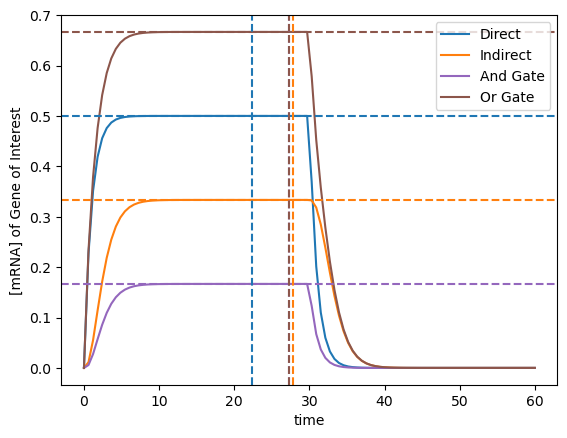

In [158]:
plt.plot(time_steps, direct_data[:,0], label = 'Direct', color = 'tab:blue')
plt.plot(time_steps, indirect_data[:,0], label = 'Indirect', color = 'tab:orange')
plt.plot(time_steps, and_data[:,0], label = 'And Gate', color = 'tab:purple')
plt.plot(time_steps, or_data[:,0], label = 'Or Gate', color = 'tab:brown')
plt.axhline(y = max(direct_data[:, 0]), color = 'tab:blue', linestyle = '--') 
plt.axhline(y = max(indirect_data[:, 0]), color = 'tab:orange', linestyle = '--') 
plt.axhline(y = max(and_data[:, 0]), color = 'tab:purple', linestyle = '--')
plt.axhline(y = max(or_data[:, 0]), color = 'tab:brown', linestyle = '--') 
plt.axvline(x = time_steps[np.where(direct_data[:, 0] == max(direct_data[:, 0]))[0][0]], color = 'tab:blue', linestyle = '--')
plt.axvline(x = time_steps[np.where(indirect_data[:, 0] == max(indirect_data[:, 0]))[0][0]], color = 'tab:orange', linestyle = '--')
plt.axvline(x = time_steps[np.where(and_data[:, 0] == max(and_data[:, 0]))[0][0]], color = 'tab:purple', linestyle = '--')
plt.axvline(x = time_steps[np.where(or_data[:, 0] == max(or_data[:, 0]))[0][0]], color = 'tab:brown', linestyle = '--')
plt.legend(loc = 'best')
plt.ylabel('[mRNA] of Gene of Interest')
plt.xlabel('time')

Direct Regulation Half Steady State 0.9090909090909092
Direct Regulation Steady State 22.727272727272727
Indirect Regulation Half Steady State 2.4242424242424243
Indirect Regulation Steady State 27.87878787878788
And Gate Half Steady State 2.4242424242424243
And Gate Steady State 27.272727272727273
Or Gate Half Steady State 1.2121212121212122
Or Gate Steady State 27.272727272727273


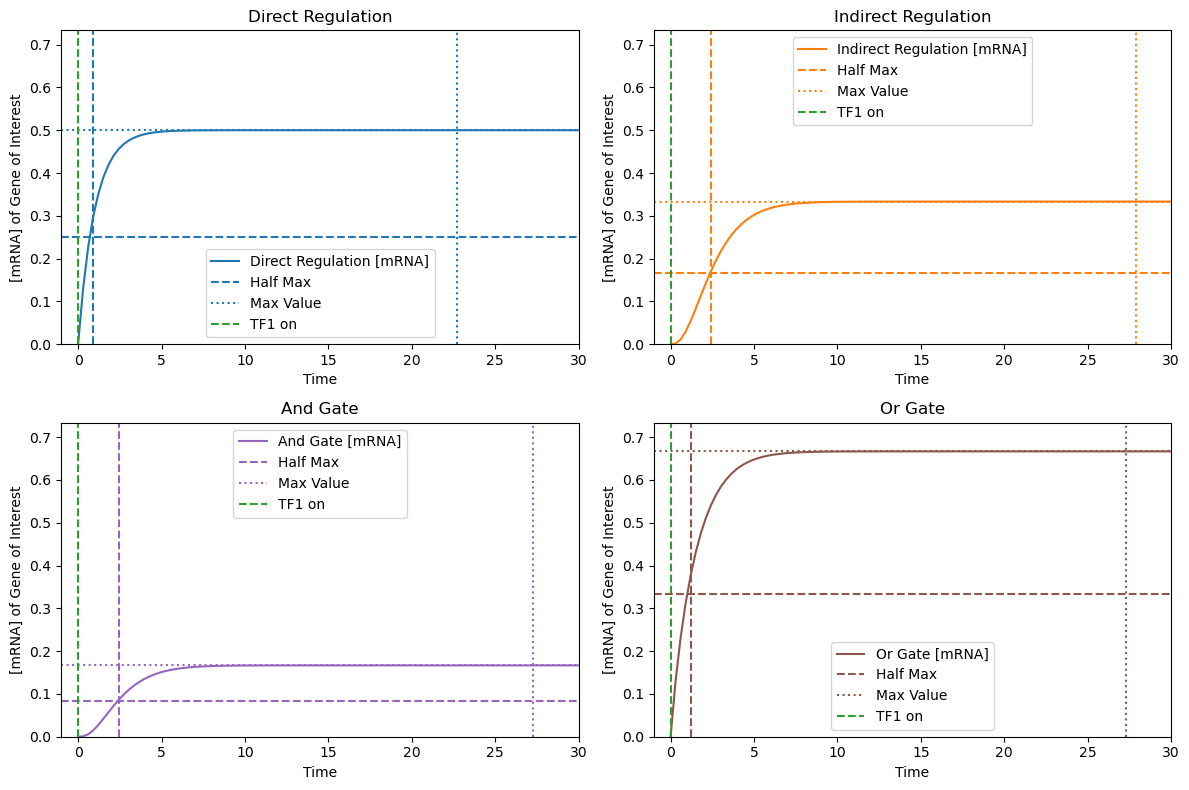

In [150]:
'''
Run with total time = 30, no TF1 off
'''

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten() 
datasets = [
    (direct_data, 'Direct Regulation', 'tab:blue'),
    (indirect_data, 'Indirect Regulation', 'tab:orange'),
    (and_data, 'And Gate', 'tab:purple'),
    (or_data, 'Or Gate', 'tab:brown')
]
for ax, (data, label, color) in zip(axs, datasets):
    ax.plot(time_steps, data[:, 0], label=label + ' [mRNA]', color=color)
    
    half_max = max(data[:, 0]) * 0.5
    ax.axhline(y=half_max, color=color, linestyle='--', label='Half Max')
    
    
    
    
    max_value = max(data[:, 0])
    ax.axhline(y=max_value, color=color, linestyle=':', label='Max Value')
    
    
    
    ax.axvline(x = 0, color = 'tab:green', label = 'TF1 on', linestyle = '--')

    intersect = np.where(data[:, 0] >= half_max)[0]
    if len(intersect) > 0:
        x = time_steps[intersect[0]]
        ax.axvline(x=x, color=color, linestyle='--')
        print(label + ' Half Steady State ' + str(x))
        
    first_max_index = np.argmax(data[:, 0])
    if data[first_max_index, 0] == max_value:
        x_max = time_steps[first_max_index]
        ax.axvline(x=x_max, color=color, linestyle=':', linewidth=1.5)
        print(label + ' Steady State ' + str(x_max))

    ax.set_title(label)
    ax.set_xlabel('Time')
    ax.set_ylabel('[mRNA] of Gene of Interest')
    ax.legend(loc='best')

x_min, x_max = time_steps.min()-1, time_steps.max()
y_min, y_max = 0, max(max(direct_data[:, 0]), max(indirect_data[:, 0]), 
                     max(and_data[:, 0]), max(or_data[:, 0])) * 1.1

for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


Direct Regulation time to return to [mRNA] = 0: 23.333333333333336
Indirect Regulation time to return to [mRNA] = 0: 28.181818181818187
And Gate time to return to [mRNA] = 0: 26.363636363636367
Or Gate time to return to [mRNA] = 0: 28.78787878787879


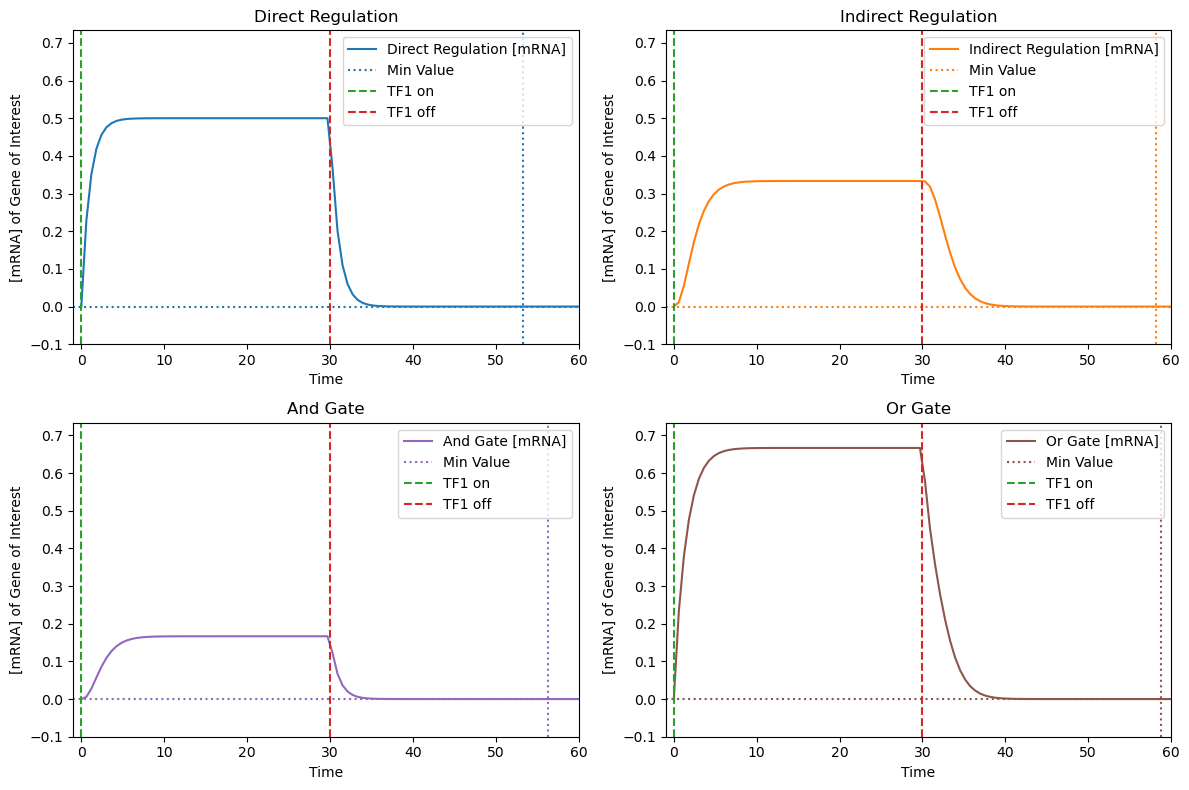

In [161]:
'''
Run with data where total time = 60, TF1 = 0 at time = 30
'''

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten() 
datasets = [
    (direct_data, 'Direct Regulation', 'tab:blue'),
    (indirect_data, 'Indirect Regulation', 'tab:orange'),
    (and_data, 'And Gate', 'tab:purple'),
    (or_data, 'Or Gate', 'tab:brown')
]
for ax, (data, label, color) in zip(axs, datasets):
    ax.plot(time_steps, data[:, 0], label=(label + ' [mRNA]'), color=color)
    
    min_value = min(data[:, 0])
    ax.axhline(y=min_value, color=color, linestyle=':', label='Min Value')
    
    ax.axvline(x = 0, color = 'tab:green', label = 'TF1 on', linestyle = '--')
    ax.axvline(x = 30, color = 'tab:red', label = 'TF1 off', linestyle = '--')
        
    first_min_index = np.argmin(data[:, 0])
    if data[first_min_index, 0] == min_value:
        x_min = time_steps[first_min_index]
        ax.axvline(x=x_min, color=color, linestyle=':', linewidth=1.5)
        print(label + ' time to return to [mRNA] = 0: '+ str(x_min-30))

    ax.set_title(label)
    ax.set_xlabel('Time')
    ax.set_ylabel('[mRNA] of Gene of Interest')
    ax.legend(loc='best')

x_min, x_max = time_steps.min()-1, time_steps.max()
y_min, y_max = -0.1, max(max(direct_data[:, 0]), max(indirect_data[:, 0]), 
                     max(and_data[:, 0]), max(or_data[:, 0])) * 1.1

for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


Text(0.5, 0, 'time')

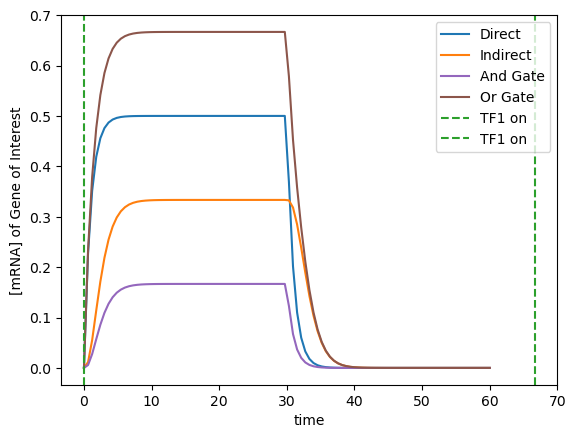

In [137]:
plt.plot(time_steps, direct_data[:,0], label = 'Direct', color = 'tab:blue')
plt.plot(time_steps, indirect_data[:,0], label = 'Indirect', color = 'tab:orange')
plt.plot(time_steps, and_data[:,0], label = 'And Gate', color = 'tab:purple')
plt.plot(time_steps, or_data[:,0], label = 'Or Gate', color = 'tab:brown')
plt.axvline(x = 0, color = 'tab:green', label = 'TF1 on', linestyle = '--')

plt.axvline(x = 100 * 2/3, color = 'tab:green', label = 'TF1 on', linestyle = '--')
plt.legend(loc = 'best')
plt.ylabel('[mRNA] of Gene of Interest')
plt.xlabel('time')